In [715]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Linear Regression

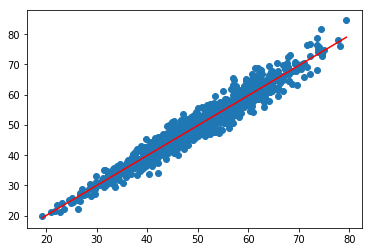

In [716]:
from sklearn import linear_model
population = 1000
age = np.random.normal(50, 10, population)
squish = age * np.random.normal(1, 0.05, population)

lr = linear_model.LinearRegression()
lr.fit(age[:, np.newaxis], squish[:, np.newaxis])
x = np.linspace(age.min(), age.max(), population)
y = lr.predict(x[:, np.newaxis])

plt.scatter(age, squish)
plt.plot(x,y, c='r')
plt.show()


# Polynomial Regression

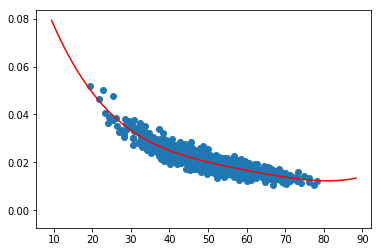

In [717]:
population = 1000
age = np.random.normal(50, 10, population)
smurfs = np.random.normal(1, 0.1, population) / age  
model = np.poly1d(np.polyfit(age, smurfs, 4))
x = np.linspace(age.min()-10, age.max()+10, population)

plt.scatter(age, smurfs)
plt.plot(x, model(x), color='r')
plt.show()

# Multivariate Regression

In [752]:
raw_data = pd.read_csv('/Users/val/dev/miscellaneous/udemy/DataScience-Python3/postes-publics-des-bibliotheques.csv', sep=";")
#raw_data.set_index("Etablissement", inplace=True)

def flatten(type_of_seat):
    data[type_of_seat] = np.where(
        raw_data["Type de poste"]==type_of_seat,
        raw_data["Nombre d'ordinateurs"],
        0
    )

data = pd.DataFrame(index=raw_data.index)  
#data["Etablissement"]= raw_data["Etablissement"]
for type_of_seat in raw_data["Type de poste"].value_counts().index:
    flatten(type_of_seat)
 
grouped_data = data.groupby(raw_data["Etablissement"]).agg(lambda x: np.sum(x))
grouped_data["total"] = grouped_data.apply(np.sum, axis=1)
grouped_data.sort_values("total", inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(grouped_data.values), columns=grouped_data.columns)
normalized_data.set_index(grouped_data.index, inplace=True)

import statsmodels.api as sm

y_col = "Catalogue"
x_cols = [c for c in normalized_data.columns if not (c==y_col or c=="total")]
model = sm.OLS(normalized_data[y_col], normalized_data[x_cols]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Catalogue   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     9.413
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           5.85e-09
Time:                        15:11:14   Log-Likelihood:                -72.808
No. Observations:                  73   AIC:                             163.6
Df Residuals:                      64   BIC:                             184.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Poste de passage Adulte       0.3846      0.136      2.826      0.006       0.113       0.657
Poste Adulte                  0.5088      0.131      3.883      0.000       0.247       0.771
Poste Jeunesse                0.0394      0.120      0.328      0.744      -0.201       0.280
Poste de passage Jeunesse     0.0987      0.086      1.150      0.254      -0.073       0.270
Poste Adulte et Jeunesse     -0.0201      0.090     -0.224      0.823      -0.200       0.159
Poste chercheur               0.3574      0.095      3.780      0.000       0.168       0.546
Poste animation              -0.1151      0.114     -1.013      0.315      -0.342       0.112
Poste animation Adulte        0.0443      0.085      0.523      0.603      -0.125       0.214
Poste chercheur DVD           0.0803      0.086      0.933      0.354      -0.092       0.252
==============================================================================
Omnibus:                        8.285   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.721
Skew:                           0.727   Prob(JB):                       0.0211
Kurtosis:                       3.649   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

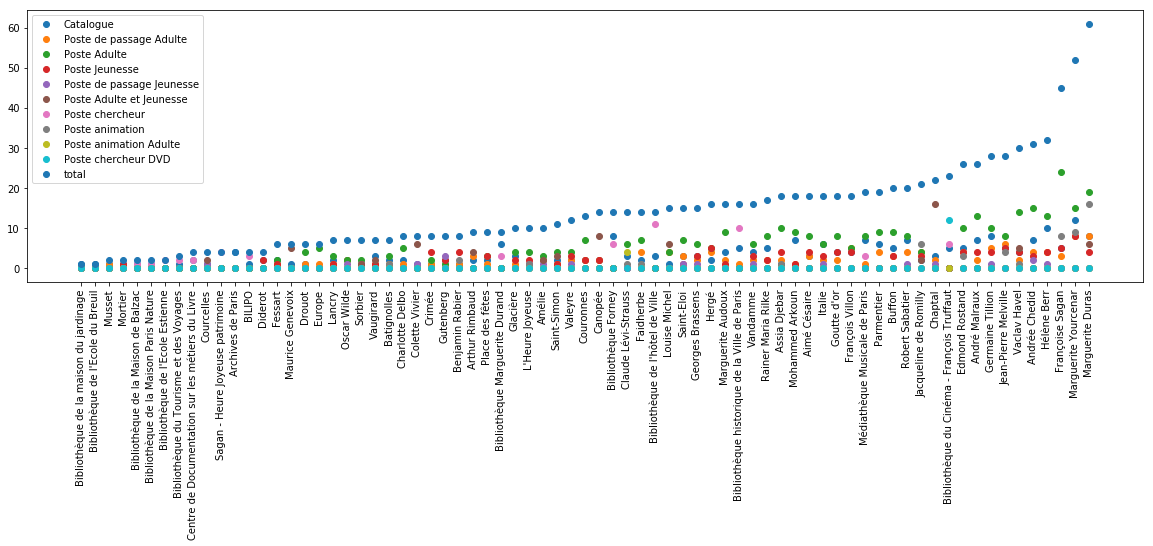

In [750]:

plt.figure(figsize=(20,5))
for i, c in enumerate(grouped_data.columns): 
    plt.scatter(grouped_data.index, grouped_data[c])
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [873]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

def get_text_positions(x_data, y_data, txt_width, txt_height):
    a = list(zip(y_data, x_data))
    text_positions = y_data.copy()
    for index, (y, x) in enumerate(a):
        local_text_positions = [i for i in a if i[0] > (y - txt_height) 
                            and (abs(i[1] - x) < txt_width * 2) and i != (y,x)]
        if local_text_positions:
            sorted_ltp = sorted(local_text_positions)
            if abs(sorted_ltp[0][0] - y) < txt_height: #True == collision
                differ = np.diff(sorted_ltp, axis=0)
                a[index] = (sorted_ltp[-1][0] + txt_height, a[index][1])
                text_positions[index] = sorted_ltp[-1][0] + txt_height
                for k, (j, m) in enumerate(differ):
                    #j is the vertical distance between words
                    if j > txt_height * 2: #if True then room to fit a word in
                        a[index] = (sorted_ltp[k][0] + txt_height, a[index][1])
                        text_positions[index] = sorted_ltp[k][0] + txt_height
                        break
    return text_positions

def text_plotter(lib_names, x_data, y_data, text_positions, axis,txt_width,txt_height):
    for name, x,y,t in zip(lib_names, x_data, y_data, text_positions):
        axis.text(x - txt_width, 1.01*t, name ,rotation=45, color='blue')
        #axis.text(x - txt_width, 1.01*t, '%d'%int(y),rotation=0, color='blue')
        if y != t:
            axis.arrow(x, t,0,y-t, color='red',alpha=0.1, width=txt_width*0.1, 
                       head_width=txt_width, head_length=txt_height*0.5, 
                       zorder=0,length_includes_head=True)

[]

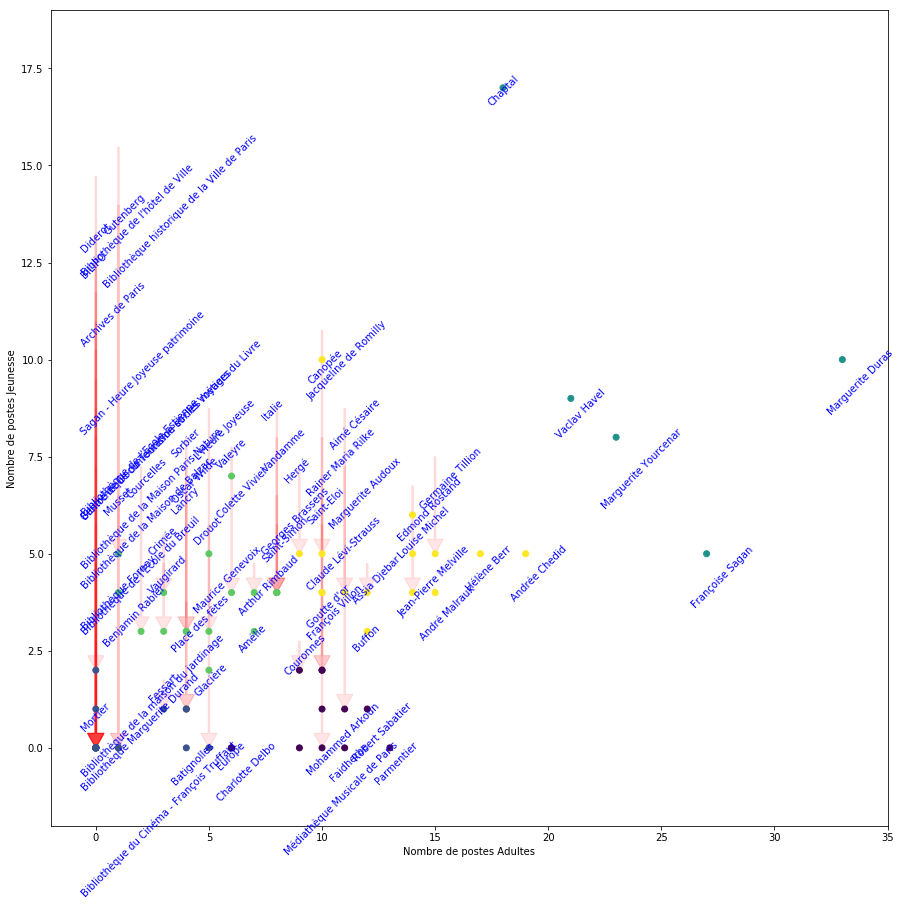

In [872]:
library_type = pd.DataFrame()
adult_columns = [c for c in grouped_data.columns if 'Adulte' in c]
youth_columns = [c for c in grouped_data.columns if 'Jeune' in c]
library_type["adults"] = grouped_data[adult_columns].agg(lambda x: np.sum(x), axis=1)
library_type["youth"] = grouped_data[youth_columns].agg(lambda x: np.sum(x), axis=1)

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

colors = ['r', 'g', 'b', 'c', 'y']
model = KMeans(n_clusters=5)
res = model.fit(scale(library_type))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1,1,1) 
ax.scatter(library_type["adults"], library_type["youth"], c=res.labels_, )

# texting
x_data = library_type["adults"].values
y_data = library_type["youth"].values
lib_names = library_type.index
txt_height = 0.04*(plt.ylim()[1] - plt.ylim()[0])
txt_width = 0.02*(plt.xlim()[1] - plt.xlim()[0])

text_positions = get_text_positions(x_data, y_data, txt_width, txt_height)
text_plotter(lib_names, x_data, y_data, text_positions, ax, txt_width, txt_height)

plt.ylim(-2,y_data.max()+2)
plt.xlim(-2,x_data.max()+2)

#for i, txt in enumerate(library_type.index):
    #x_lab = library_type.loc[txt, "adults"]
    #y_lab = library_type.loc[txt, "youth"]
    #plt.annotate(
    #    txt, 
    #    (x_lab, y_lab),
    #    fontsize=8,
    #    color=colors[res.labels_[i]],
    #    rotation=np.random.randint(45)
    #)

    
    
plt.xlabel("Nombre de postes Adultes")
plt.ylabel("Nombre de postes Jeunesse")
plt.plot()
